# Group 7
## Homework 2
### Viacheslav Borodin, Michael Mallon, Cathal Mc Connell , Stephen Connolly

<h3>Table of Contents<span class="tocSkip"></span></h3><br></br>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1:-From-Raw-Data-to-Clean-Representation-of-Documents " data-toc-modified-id="Part1:-From-Raw-Data-to-Clean-Representation-of-Documents"><span class="toc-item-num">Part 1&nbsp;&nbsp;</span>: From Raw Data to Clean Representation of Documents </a></span><ul class="toc-item"><li><span><span><a href="#Lemmatization" data-toc-modified-id="Lemmatization"><span class="toc-item-num">Lemmatization</a></span></li><li><span><a href="#Check-if-data-is-clean" data-toc-modified-id="Check-if-data-is-clean"><span class="toc-item-num">Checking if the data is clean</a></span></li></ul>
    
<li><span><a href="#Part-2:-Analysis-of-Data" data-toc-modified-id="Part 2: Analysis of Data"><span class="toc-item-num">Part 2&nbsp;&nbsp;</span>: Analysis of Data</a></span><ul class="toc-item"><li><span><span>
<a href="#Bi-Gram-&-Tri-Grams" data-toc-modified-id="Bi-Gram-&-Tri-Grams"><span class="toc-item-num">Bi-Gram & Tri-Grams</a></span></li>
<li>
<span>
<a href="#Word-Embedding" data-toc-modified-id="Word-Embedding"><span class="toc-item-num">Word Embedding</a></span></li>
<li>
<span>
<a href="#Doc2Vec" data-toc-modified-id="Doc2Vec"><span class="toc-item-num">Doc2Vec</a></span></li>
<li>
<span>
<a href="#WordCloud" data-toc-modified-id="WordCloud"><span class="toc-item-num">WordCloud</a></span></li><li><span>
<a href="#Most-Common-Words" data-toc-modified-id="Most-Common-Words"><span class="toc-item-num">Most Common Words</a></span></li></ul></li>
    
<li><span><a href="#Part-3:-From-Clean-Representation-of-Documents-to-Numerical-Representation-Vectors" data-toc-modified-id="Part 3: From Clean Representation of Documents to Numerical Representation Vectors"><span class="toc-item-num">Part 3&nbsp;&nbsp;</span>: From Clean Representation of Documents to Numerical Representation Vectors</a></span><ul class="toc-item"><li><a href="#TFIDF" data-toc-modified-id="TFIDF"><span class="toc-item-num">TFIDF</a></span></li></ul></li>

<li><span><a href="#Part-4:-Model-Learning-and-Analysis-of-the-model-and-Model-Evaluation-and-Discussion" data-toc-modified-id="Part 4: Model Learning and Analysis of the model and Model Evaluation and Discussion"><span class="toc-item-num">Part 4&nbsp;&nbsp;</span>: Model Learning and Analysis of the model and Model Evaluation and Discussion</a>
</span><ul class="toc-item"><li><span><span>
<a href="#Random-Forest-Classification" data-toc-modified-id="Random-Forest-Classification"><span class="toc-item-num">Random Forest Classification</a></span></li>
<li>
<span>
<a href="#Multinomial-Naive-Bayes" data-toc-modified-id="Multinomial-Naive-Bayes"><span class="toc-item-num">Multinomial Naive Bayes</a></span></li>
<li>
<span>
<a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression"><span class="toc-item-num">Logistic Regression</a></span></li>
<li>
<span>
<a href="#Ridge-Classification" data-toc-modified-id="Ridge-Classification"><span class="toc-item-num">Ridge Classification</a></span></li>
<li>
<span>
<a href="#KNN" data-toc-modified-id="KNN"><span class="toc-item-num">KNN</a></span></li><li><span>
<a href="#Which-classifier-performs-best?" data-toc-modified-id="Which-classifier-performs-best?"><span class="toc-item-num">Which classifier performs best?</a></span></li></ul></li>

<li><span><a href="#Part-5:-Model-Accuracy-on-Test-Data" data-toc-modified-id="Part 5: Model Accuracy on Test Data"><span class="toc-item-num">Part 5&nbsp;&nbsp;</span>: Model Accuracy on Test Data</a></span><ul class="toc-item"><li>
<span>
<a href="#Split-Data-Model-Results-25%" data-toc-modified-id="Split-Data-Model-Results-25%"><span class="toc-item-num">Split Data Model Results 25%</a></span></li>

<li>
<span>
<a href="#Split-Data-Model-Results-50%" data-toc-modified-id="Split-Data-Model-Results-50%"><span class="toc-item-num">Split Data Model Results 50%</a></span></li>

<li>
<span>
<a href="#Split-Data-Model-Results-75%" data-toc-modified-id="Split-Data-Model-Results-75%"><span class="toc-item-num">Split Data Model Results 75%</a></span></li>
<li>
<span>
<a href="#Testing-New-Data" data-toc-modified-id="Testing-New-Data"><span class="toc-item-num">Testing New Data</a></span></li><li><span>
<a href="#Final-Classification" data-toc-modified-id="Final-Classification"><span class="toc-item-num">Final Classification</a></span></li></ul></li>

In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import sklearn
import os, io, nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
import collections
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
import gensim
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Importing training set

In [2]:
raw_trainset = pd.read_csv('trainingset.csv',sep='^',header=0)

In [3]:
# Quick look at the dataframe
raw_trainset.head()

,content,category
0,French boss to leave EADS The French co-head o...,business
1,"Gamers could drive high-definition TV, films, ...",tech
2,Stalemate in pension strike talks Talks aimed ...,politics
3,Johnny and Denise lose Passport Johnny Vaughan...,entertainment
4,Tautou 'to star in Da Vinci film' French actre...,entertainment


#### Importing test data

In [4]:
raw_testdata = pd.read_csv('testdata.csv',sep='^',header=0)

In [5]:
# Quick look at the dataframe
raw_testdata.head()

,content
0,Eminem secret gig venue revealed Rapper Eminem...
1,Munster Cup tie switched to Spain Munster's He...
2,Eastwood's Baby scoops top Oscars Clint Eastwo...
3,Spears seeks aborted tour payment Singer Britn...
4,Gadget show heralds MP3 Christmas Partners of ...


## Part 1: From Raw Data to Clean Representation of Documents 

#### All definitions used to clean our documents

In [6]:
### Finds All Stop Words ###
def find_stop_words():
    stop_words = nltk.corpus.stopwords.words('english')
    
    ### salutations added (lowercase as decapitalisation will occur first ###
    salutations = ['mr','mrs','mss','dr','phd','prof','rev']
    stop_words.extend(salutations)
        
    additional_stop_words = ["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]
    stop_words.extend(additional_stop_words)
    
    return stop_words

### Takes strings of text and returna a new string with hyphen swapped with an underscore. ###
### (This keeps words together) ie: co-ordinates => co_ordinates ###
def convert_hyphens(series):
    
    return series.replace("-", "_")

### Takes string of text and returns it as tokens ###
def tokenize(series):
    
    TOKENIZER_REGEX = r'\w+'
    tokenizer = nltk.tokenize.RegexpTokenizer(TOKENIZER_REGEX)  
    return tokenizer.tokenize(series)

### Decapitalizes all the tokens provided,keeps abbreviations ###

def decapitalize(series):
   
    for word in series:
        if word in series is word.upper(): ### if a word is all upper case it returns the word ###
            return [word.upper() for word in series]
        else:
            return [word.lower() for word in series] ### else decapitalize ###
        
### Removes all numbers from tokens only if the token only contains a number ###
def remove_numbers(series):
    
    return [word for word in series if not word.isnumeric()]

### As the previous def (convert_hyphens) removes hyphens and leaves underscores we remove all cases of them ###

def remove_special_chars(series):
    
    remove_underscores = set(["", "_"])
    return [word.replace("_", "") for word in series if word not in remove_underscores] 

### Removes all the stop words previously obtained from def (find_stop_words) ###
def remove_stop_words(series):
    
    return [word for word in series if word not in find_stop_words()]

def pos_to_wordnet_tag(pos_tag):
    """
    Convert an NLTK.pos_tag to a WordNet tag that the lemmatizer uses.
    """
    if pos_tag.lower().startswith('j'):
        return 'a'
    elif pos_tag.lower().startswith('v'):
        return 'v'
    elif pos_tag.lower().startswith('n'):
        return 'n'
    elif pos_tag.lower().startswith('r'):
        return 'r'
    else:
        # Default POS for lemmatization is noun.
        return 'n'
    
### Takes all tokens and returns transformed tokens removing all plurals,past-tense to one common word ###   
### Example : Lists => List or Talks => Talk ###
def lemmatize(series):   
 
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    lemmatized_words = []
    
    for word, tag in nltk.pos_tag(series):
        
        wordnet_tag = pos_to_wordnet_tag(tag)
        
        lemmatized_words.extend([lemmatizer.lemmatize(word, wordnet_tag)])
        
    return lemmatized_words

In [7]:
raw_trainset[raw_trainset['content'].str.contains('-')].head()

,content,category
0,French boss to leave EADS The French co-head o...,business
1,"Gamers could drive high-definition TV, films, ...",tech
2,Stalemate in pension strike talks Talks aimed ...,politics
3,Johnny and Denise lose Passport Johnny Vaughan...,entertainment
4,Tautou 'to star in Da Vinci film' French actre...,entertainment


In [8]:
### Applying convert_hyphens definition ###
raw_trainset['content'] = raw_trainset['content'].apply(convert_hyphens)

In [9]:
### Checking convert_hyphens ###
raw_trainset[raw_trainset['content'].str.contains('-')]

,content,category


In [10]:
### Applying tokensize definition and checking if it works ###

raw_trainset['tokens'] = raw_trainset['content'].apply(tokenize)
raw_trainset.tokens.head()

0    [French, boss, to, leave, EADS, The, French, c...
1    [Gamers, could, drive, high_definition, TV, fi...
2    [Stalemate, in, pension, strike, talks, Talks,...
3    [Johnny, and, Denise, lose, Passport, Johnny, ...
4    [Tautou, to, star, in, Da, Vinci, film, French...
Name: tokens, dtype: object

In [11]:
### Takes text and returns nouns ###
def extract_noun(text):
    import nltk
    lines = text
    # function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN'
    # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    return nouns

In [12]:
import nltk
[n,d] = raw_trainset.shape
raw_trainset['noun_Tokens'] = ['']*n

for index, row in raw_trainset.iterrows():
    raw_trainset['noun_Tokens'].iloc[index] = extract_noun(" ".join(row['tokens']))

raw_trainset.head(10)

,content,category,tokens,noun_Tokens
0,French boss to leave EADS The French co_head o...,business,"[French, boss, to, leave, EADS, The, French, c...","[boss, EADS, co_head, defence, aerospace, grou..."
1,"Gamers could drive high_definition TV, films, ...",tech,"[Gamers, could, drive, high_definition, TV, fi...","[Gamers, high_definition, TV, films, games, ti..."
2,Stalemate in pension strike talks Talks aimed ...,politics,"[Stalemate, in, pension, strike, talks, Talks,...","[Stalemate, pension, strike, talks, Talks, str..."
3,Johnny and Denise lose Passport Johnny Vaughan...,entertainment,"[Johnny, and, Denise, lose, Passport, Johnny, ...","[Johnny, Denise, Passport, Johnny, Vaughan, De..."
4,Tautou 'to star in Da Vinci film' French actre...,entertainment,"[Tautou, to, star, in, Da, Vinci, film, French...","[Tautou, Da, Vinci, film, French, actress, Aud..."
5,Media seek Jackson 'juror' notes Reporters cov...,entertainment,"[Media, seek, Jackson, juror, notes, Reporters...","[Media, seek, Jackson, juror, Reporters, singe..."
6,Horror film heads US box office A low_budget h...,entertainment,"[Horror, film, heads, US, box, office, A, low_...","[Horror, film, heads, US, box, office, A, low_..."
7,Kerr frustrated at victory margin Republic of ...,sport,"[Kerr, frustrated, at, victory, margin, Republ...","[Kerr, victory, margin, Republic, Ireland, man..."
8,US casino 'tricks' face ban in UK Controversia...,politics,"[US, casino, tricks, face, ban, in, UK, Contro...","[US, casino, tricks, ban, UK, Controversial, U..."
9,Klinsmann issues Lehmann warning Germany coach...,sport,"[Klinsmann, issues, Lehmann, warning, Germany,...","[Klinsmann, issues, Lehmann, Germany, coach, J..."


We first tried to use the column <b>"noun_Tokens"</b> for our classification but it proved inferior to using <b>"tokens"</b> which produced a higher accuracy. Hence we have used the column <b>"tokens"</b> for the remainder of the assignment.

In [13]:
### Removing Stop Words ###
raw_trainset['tokens'] = raw_trainset['tokens'].apply(remove_stop_words)

In [14]:
### Decapitalizing the column tokens ###
raw_trainset['tokens'] = raw_trainset['tokens'].apply(decapitalize)

In [15]:
### Re-applying remove stop words to remove stop words that where previously capitalized ie: Use###
raw_trainset['tokens'] = raw_trainset['tokens'].apply(remove_stop_words)

In [16]:
raw_trainset.head()

,content,category,tokens,noun_Tokens
0,French boss to leave EADS The French co_head o...,business,"[french, boss, leave, eads, french, co_head, e...","[boss, EADS, co_head, defence, aerospace, grou..."
1,"Gamers could drive high_definition TV, films, ...",tech,"[gamers, drive, high_definition, tv, films, ga...","[Gamers, high_definition, TV, films, games, ti..."
2,Stalemate in pension strike talks Talks aimed ...,politics,"[stalemate, pension, strike, talks, talks, aim...","[Stalemate, pension, strike, talks, Talks, str..."
3,Johnny and Denise lose Passport Johnny Vaughan...,entertainment,"[johnny, denise, lose, passport, johnny, vaugh...","[Johnny, Denise, Passport, Johnny, Vaughan, De..."
4,Tautou 'to star in Da Vinci film' French actre...,entertainment,"[tautou, star, da, vinci, film, french, actres...","[Tautou, Da, Vinci, film, French, actress, Aud..."


In [17]:
### Removing Numbers from tokens ###
raw_trainset['tokens'] = raw_trainset['tokens'].apply(remove_numbers)

#### Lemmatization

In [18]:
### Creating a column "tokens_lemmatized" with all lemmatized tokens from the column "tokens" ###
raw_trainset['tokens_lemmatized'] = raw_trainset['tokens'].apply(lemmatize)

In [19]:
### Quick look at new dataframe ###
raw_trainset.head()

,content,category,tokens,noun_Tokens,tokens_lemmatized
0,French boss to leave EADS The French co_head o...,business,"[french, boss, leave, eads, french, co_head, e...","[boss, EADS, co_head, defence, aerospace, grou...","[french, bos, leave, eads, french, co_head, eu..."
1,"Gamers could drive high_definition TV, films, ...",tech,"[gamers, drive, high_definition, tv, films, ga...","[Gamers, high_definition, TV, films, games, ti...","[gamers, drive, high_definition, tv, film, gam..."
2,Stalemate in pension strike talks Talks aimed ...,politics,"[stalemate, pension, strike, talks, talks, aim...","[Stalemate, pension, strike, talks, Talks, str...","[stalemate, pension, strike, talk, talk, aim, ..."
3,Johnny and Denise lose Passport Johnny Vaughan...,entertainment,"[johnny, denise, lose, passport, johnny, vaugh...","[Johnny, Denise, Passport, Johnny, Vaughan, De...","[johnny, denise, lose, passport, johnny, vaugh..."
4,Tautou 'to star in Da Vinci film' French actre...,entertainment,"[tautou, star, da, vinci, film, french, actres...","[Tautou, Da, Vinci, film, French, actress, Aud...","[tautou, star, da, vinci, film, french, actres..."


In [20]:
### Removing Special Characters, Numbers and New Stop Words created from the lemmatized column. ###

In [21]:
raw_trainset['tokens_lemmatized'] = raw_trainset['tokens_lemmatized'].apply(remove_special_chars)

In [22]:
raw_trainset['tokens_lemmatized'] = raw_trainset['tokens_lemmatized'].apply(remove_numbers)

In [23]:
### Re-applying remove stop words to remove stop words that where previously lemmatized ie: uses => use ### 

In [24]:
raw_trainset['tokens_lemmatized'] = raw_trainset['tokens_lemmatized'].apply(remove_stop_words)

In [25]:
first_article = raw_trainset.tokens_lemmatized.iloc[2].copy()

In [26]:
### Testing if the word talks has changed to talk once lemmazatized ###

In [27]:
count_talks = first_article.count("talks")
count_talk = first_article.count("talk")

print("Count of 'talks' = {}".format(count_talks))
print("Count of 'talk'  = {}".format(count_talk))

Count of 'talks' = 0
Count of 'talk'  = 3


#### Check if data is clean

In [28]:
def columnIsClean(series):
    return all([tokensAreClean(tokens) for tokens in series])
   

def tokensAreClean(tokens):    
    if any([token.isupper() for token in tokens]):
        print("There are uppercase tokens")
        return False
    
    elif any([not token.isalnum() for token in tokens]):
        print("There exists alpha numberic tokens")
        return False
    
    elif any([token.isnumeric() for token in tokens]):
        print("There exists numberic tokens")
        return False
    
    elif any([True for token in tokens if token in find_stop_words()]):
        print("There exists stop words")
        return False
    
    else:
        return True

In [29]:
raw_trainset['tokens_lemmatized'] = raw_trainset['tokens_lemmatized'].apply(remove_special_chars)

In [30]:
data_cleaned_successfully = columnIsClean(raw_trainset['tokens_lemmatized'])

assert(data_cleaned_successfully)

if data_cleaned_successfully:
    print("Data Cleaned Successfully!")

Data Cleaned Successfully!


## Part 2: Analysis of Data

### Bi-Gram & Tri-Grams

In [31]:
list_Tokens =  list(([item for items in raw_trainset.tokens.tolist() for item in items]))

In [32]:
## Get Frequency
import nltk
from nltk.tokenize import RegexpTokenizer

from nltk import ngrams
n = 2 ## Bigram

# Get token of raw text
from nltk.tokenize import RegexpTokenizer
pattern = r'\w+'
tokenizer = RegexpTokenizer(pattern)



H1_bigram = ngrams(list_Tokens, n)  ## Generator object
H1_frequencies = nltk.FreqDist(H1_bigram) ## Get freqs

## to dataframe
dict_items =list(dict(H1_frequencies).items())
df_bigramFreq = pd.DataFrame(dict_items,columns=['Bigram','Frequency']).sort_values(by='Frequency', ascending=False)

print("Bigrams Sorted By The Highest Frequency")
print('Size: '+ str(len(df_bigramFreq)))
df_bigramFreq.head(5)

Bigrams Sorted By The Highest Frequency
Size: 225096


,Bigram,Frequency
234,"(told, bbc)",247
485,"(prime, minister)",221
1540,"(chief, executive)",128
2216,"(tony, blair)",127
235,"(bbc, news)",123


As seen from the bigrams above, the frequency of each bigram is represented. In terms of the actual bigrams that are above we can see that many of the bigrams are related to politics especially the prime minister who was Tony Blair at the time of this article. The article is most definitely related to BBC news as it has the words BBC news in it and is relating to prime minister and politics.

In [33]:
### Tri-grams
from nltk.tokenize import RegexpTokenizer

from nltk import ngrams
n = 3
from nltk.tokenize import RegexpTokenizer
pattern = r'\w+'
tokenizer = RegexpTokenizer(pattern)

H1_trigram = ngrams(list_Tokens,n)

# ## Get freqs|
H1_trigram_frequencies = nltk.FreqDist(H1_trigram)

## to dataframe
dict_items =list(dict(H1_trigram_frequencies).items())
df_trigramFreq = pd.DataFrame(dict_items,columns=['Trigram','Frequency']).sort_values(by='Frequency', ascending=False)

print("Trigrams Sorted By The Highest Frequency")
print('Size: '+ str(len(df_trigramFreq)))
df_trigramFreq.head(5)

Trigrams Sorted By The Highest Frequency
Size: 263769


,Trigram,Frequency
240,"(told, bbc, news)",96
241,"(bbc, news, website)",63
5229,"(told, bbc, radio)",44
8437,"(leader, michael, howard)",40
27035,"(told, bbc, sport)",38


As we can see from the above trigrams, it is possible that the these documents are either taken directly off BBC news or are very highly related to BBC news in some way or another. As seen from the results above the highest trigram frequency within the document has the words bbc news website , indicating that this document has a high relevance to BBC news.

### Word Embedding

As part of our analysis we used word embedding with the use of word2vec from the gensim package. Word2Vec is a technique which learns the word embedding of a text corpus. The text corpus that we are using are the lemmatized tokens which will be loaded in. The aim of this technique is to group words that are similar enough in close proximity to each other. 

In [34]:
df = raw_trainset

It is important to check that the data has been loaded in correctly before proceeding any further in our analysis. 

In [35]:
df.head()

,content,category,tokens,noun_Tokens,tokens_lemmatized
0,French boss to leave EADS The French co_head o...,business,"[french, boss, leave, eads, french, co_head, e...","[boss, EADS, co_head, defence, aerospace, grou...","[french, bos, leave, eads, french, cohead, eur..."
1,"Gamers could drive high_definition TV, films, ...",tech,"[gamers, drive, high_definition, tv, films, ga...","[Gamers, high_definition, TV, films, games, ti...","[gamers, drive, highdefinition, tv, film, game..."
2,Stalemate in pension strike talks Talks aimed ...,politics,"[stalemate, pension, strike, talks, talks, aim...","[Stalemate, pension, strike, talks, Talks, str...","[stalemate, pension, strike, talk, talk, aim, ..."
3,Johnny and Denise lose Passport Johnny Vaughan...,entertainment,"[johnny, denise, lose, passport, johnny, vaugh...","[Johnny, Denise, Passport, Johnny, Vaughan, De...","[johnny, denise, lose, passport, johnny, vaugh..."
4,Tautou 'to star in Da Vinci film' French actre...,entertainment,"[tautou, star, da, vinci, film, french, actres...","[Tautou, Da, Vinci, film, French, actress, Aud...","[tautou, star, da, vinci, film, french, actres..."


We now import Word2Vec from the gensim package in order to create a word embedding later on. We define some parameters in our arguments. Firstly the min_count will only print the words that have this count so therefore by theory every word which is in the corpus should be printed at least one as we have specified the minimum count to 1 indicating any word which appears a minimum of once will be printed. The size will determine the dimensions of the embedding which will show the length of the dense vector to represent each word. Finally the window is the distance between a target word and words around the target word. 

In [36]:
from gensim.models import Word2Vec
test = Word2Vec(df['tokens_lemmatized'], min_count=1, size =200,  window=5)

Make sure it is a Word2Vec gensim model and is trained and check the size of the model

In [37]:
test

In [38]:
test.vector_size

200

wv will allow us to access the words within the model, this is the word vector model and we can check the length of the words within the model and find out the total amount of words.

In [39]:
len(test.wv.vocab)

22353

Also putting the words from the vector model will allow us to print the words within the model. To do this we will store it in words which stores the list of the word vector model.

In [40]:
words  = list(test.wv.vocab)

In [41]:
print(words)

['french', 'bos', 'leave', 'eads', 'cohead', 'european', 'defence', 'aerospace', 'group', 'philippe', 'camus', 'post', 'statement', 'accept', 'invitation', 'return', 'fulltime', 'lagardere', 'give', 'role', 'board', 'director', 'airbus', 'head', 'noel', 'forgeard', 'set', 'replace', 'bring', 'company', 'power', 'struggle', 'end', 'fight', 'hit', 'headline', 'france', 'analyst', 'fear', 'destabilise', 'finance', 'minister', 'herve', 'gaymard', 'record', 'deplore', 'infighting', 'put', 'dispute', 'departure', 'clear', 'support', 'main', 'shareholder', 'government', 'germany', 'daimlerchrysler', 'rainer', 'hertrich', 'german', 'step', 'contract', 'expire', 'year', 'recently', 'pressure', 'a380', 'superjumbo', 'run', 'budget', 'majority', 'owner', 'admit', 'earlier', 'week', 'project', '45bn', 'euros', 'â', '1bn', '9bn', 'deny', 'medium', 'current', 'overrun', 'sake', 'transparency', 'forecast', 'total', 'cost', 'risk', 'euro', '686m', '32bn', 'lci', 'television', 'due', 'enter', 'service'

We can also check the most similar words to each other by using the .most_similar method within the gensim package for word2vec. The method .most_similar will compute the cosine similarity between a mean of the projection weight vectors of the given words and the vectors for every single words that is in the model. It is possible to interpret positive and negative values into the method where a positive word contributes positively to the similarity and a negative word contributes negatively to the word.

In [42]:
test.most_similar('german')

[('factor', 0.9999308586120605),
 ('gain', 0.9999241828918457),
 ('factory', 0.9999202489852905),
 ('energy', 0.9999191761016846),
 ('significant', 0.9999169111251831),
 ('region', 0.999915599822998),
 ('loan', 0.9999064207077026),
 ('boeing', 0.9999017119407654),
 ('jail', 0.9999012351036072),
 ('order', 0.9998948574066162)]

In [43]:
test.most_similar('call')

[('attack', 0.9992200136184692),
 ('choice', 0.9992067813873291),
 ('change', 0.9991941452026367),
 ('telephone', 0.9991859793663025),
 ('publish', 0.9989905953407288),
 ('confidential', 0.9989899396896362),
 ('swing', 0.99898761510849),
 ('police', 0.9989810585975647),
 ('tps', 0.9989584684371948),
 ('seeker', 0.998957633972168)]

Another way to check word embedding within python is the use of FastText which again is imported from the gensim model. It works similarly enough to the word2vec model. As we can see below it has the same parameters and arguments where the only difference is that we have added sg which is the training algorithm.

In [44]:
from gensim.models import FastText
model_ted = FastText(df['tokens_lemmatized'], size=100, window=5, min_count=5, workers=4,sg=1)

It is interesting to note the differences in the most similar words and the value of them in comparison to word2vec. As we can see below the list of the words most similar to german are quite different to those of the word2vec. The ones provided by word2vec have a better relevance to the word german in comparison to those of fasttext. It is interesting to note the values too that word2vec provides. Word2vec provides a higher similarity. 

In [45]:
model_ted.most_similar('german')

[('germany', 0.9784719944000244),
 ('major', 0.9521135091781616),
 ('indonesia', 0.9467525482177734),
 ('venezuelan', 0.9451652765274048),
 ('indonesian', 0.9437047839164734),
 ('asian', 0.9406383633613586),
 ('manuel', 0.9398680329322815),
 ('lankan', 0.9376845955848694),
 ('imf', 0.9334140419960022),
 ('gross', 0.9325335025787354)]

As seen below FastText provides less accurate similarities to words as seen by the word call , there are not many words that would greatly relate to the word call below.

In [46]:
model_ted.most_similar('call')

[('cabir', 0.9323514103889465),
 ('safer', 0.9225914478302002),
 ('wider', 0.9108951091766357),
 ('alter', 0.9104015231132507),
 ('unveils', 0.9081435799598694),
 ('sooner', 0.9069204330444336),
 ('backer', 0.9057055711746216),
 ('unveiled', 0.9016839861869812),
 ('ofsted', 0.9013990163803101),
 ('stem', 0.8996151089668274)]

Below we will plot the word embedding using word2vec for the entire corpus. Firstly we will just access the vectors for the word german.

In [47]:
print(test['german'])

[-0.867784    0.14975326 -0.2332195   0.26732355  0.06916871 -0.4177712
  0.13429008 -0.3316636   0.04241966  0.49787202  0.16087076 -0.50205904
 -0.21635365  0.1278963   0.2752084  -0.01131323 -0.27239537 -0.05526602
 -0.01718768  0.24001463  0.17314123  0.43889755  0.21410468 -0.1330688
 -0.15278204  0.3397132  -0.03920178  0.46830806 -0.5363305   0.23576972
 -0.0144884   0.08432956  0.21922593 -0.57104224 -0.2021257  -0.22035271
  0.32656977 -0.35296234  0.4441164  -0.62730443 -0.02266167  0.12863109
 -0.8322566  -0.11943092 -0.28342313 -0.51956785 -0.23752445 -0.04903644
 -0.23307706 -0.12816094 -0.12268761  0.38210744 -0.39325386 -0.22398962
  0.16144088  0.39755228 -0.01073659 -0.08635014 -0.20711142  0.7181827
 -0.3575165  -0.57741183  0.24082246 -0.07544034 -0.32910535 -0.05957041
 -0.0086012  -0.1545182   0.07766392  0.06922732 -0.43711743 -0.35178912
 -0.0909854   0.34845254 -0.19532128 -0.6167762  -0.2900679   0.04054357
  0.50340134 -0.5433803  -0.39088544  0.16969687 -0.01

It is important that we save the new model and check everything is working correctly. We will save our original test model from above into a new variable name new_model. As we can see the vocab and the size have stayed the same so the saving process worked.

In [48]:
test.save('testmodel.bin')
new_model_ = Word2Vec.load('testmodel.bin')
print(new_model_)

Word2Vec(vocab=22353, size=200, alpha=0.025)


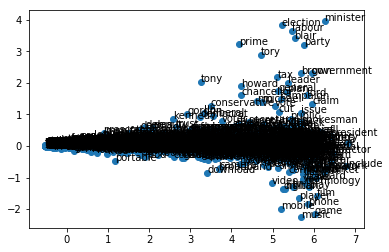

In [49]:
from sklearn.decomposition import PCA

X = new_model_[new_model_.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(new_model_.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

Seeing as the visualisation of the graph above when used with word2vec isn't very clear as it is over populated and clustered we found a better method to visually visualise the results. Firstly the graph above works as we can see in the top right corner we have the words 'minister', 'prime', 'tony', 'blair', 'election', 'party'. As we can see these words are quite similar so it seems that method is working however it is not possible to visually visualise this correctly. Below we will use TSNE which a another method which will allow us to visualise the similarity between objects. It is used alongside Word2Vec which will take a group of high dimensional vocabularly word feature vectors and then eventually it compresses down to 2 dimensional x and y coordinate pairs. It keeps words that have similar meaning on the same plane and reduced the distance of words that are not so similar.

Learned from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [50]:
def tsne_plot(model):
    label = []
    token = []

    for word in model.wv.vocab:
        token.append(model[word])
        label.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca',
                      n_iter=2500,random_state=23)
    tsne_values = tsne_model.fit_transform(token)

    x = []
    y = []
    for value in tsne_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 15))
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(label[i],
                     xy=(x[i], y[i]),
                     xytext=(7, 3),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.show()

In [51]:
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
model = Word2Vec(df['tokens_lemmatized'], size=100, window=20, min_count=200, workers=4)

In [52]:
from gensim.models import word2vec

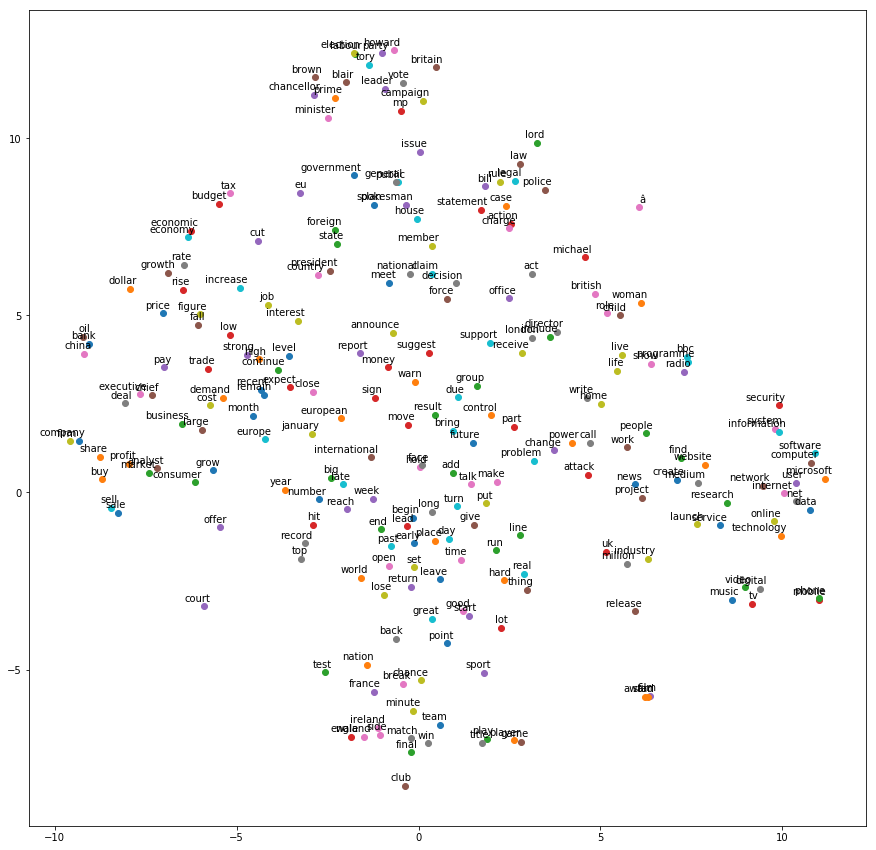

In [53]:
tsne_plot(model)

As we can see from the graph above We are only plotting words that have a minimum count of over 200 so these are essentially what we can consider the most popular words or words that seem to have a high frequency in the text. Again if we closely analyse this graph we can see that the words that are on the same plane are very much similar to one another. If we look at coordinates [-5.0, -11.0] we can see that the words vote and campaign are quite close to each other and on the same plane which is an indication the word embedding is working

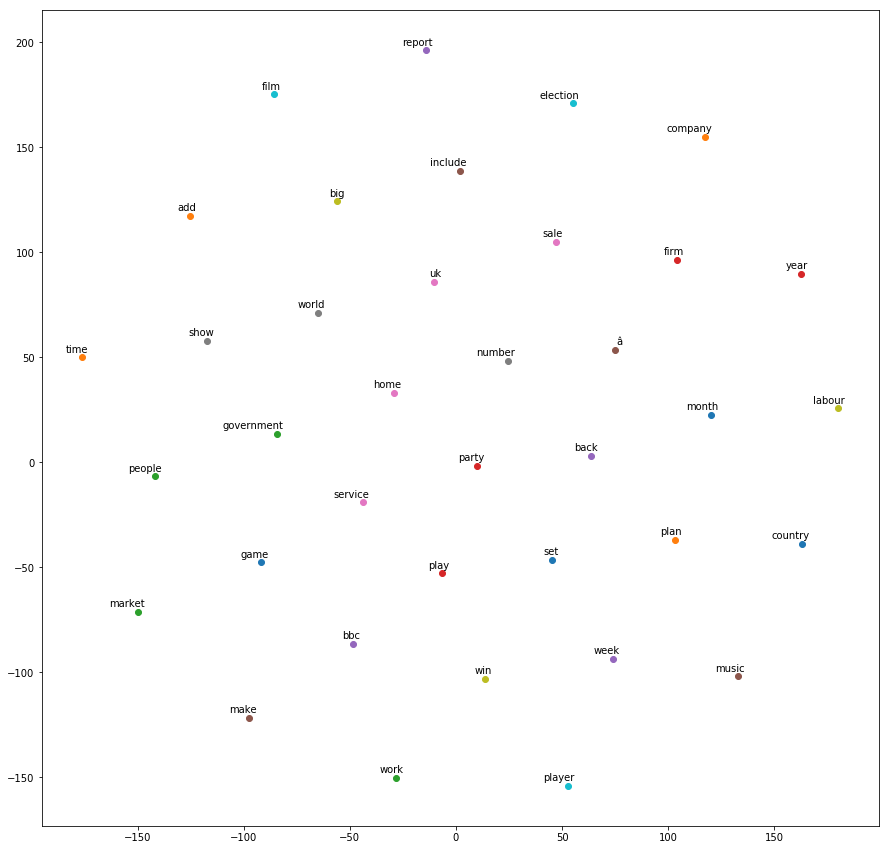

In [54]:
model = Word2Vec(df['tokens_lemmatized'], size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

We then take a look at only words that appear a minum of 500 times as seen from the graph above. It is interesting to note if the method is still as accurate so we changed it to min_count = 100,200 and 500 to comapare the graphs and check how clustered and populated the graphs were. Again party and election were on the same plane. 

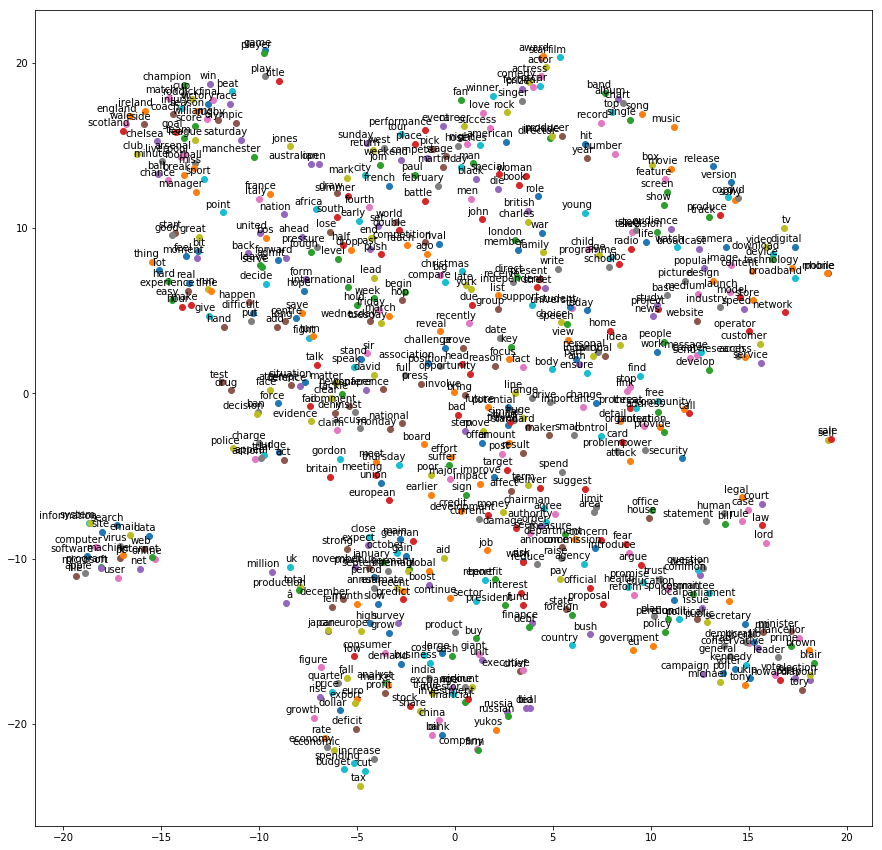

In [55]:
model = Word2Vec(df['tokens_lemmatized'], size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

This graph is again quite similar to the other ones above the only noteable difference is that the graph is more clustered and over populated so it is hard to read the word vectors along some coordinates. This graph gives us more of an insight into the word embedding of the words that appear more within the corpus as the minimum count is set to 100.

### Doc2Vec

Finally what we looked at within word embedding was the idea of Doc2Vec which is a numeric representation of the whole corpus. 

In [56]:
import gensim
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
allTokens = df['tokens_lemmatized']
allcontent =[]
j=0
for each in allTokens:
    allcontent.append(LabeledSentence1(each,[j]))
    j+=1
print(allcontent[2])

TaggedDocument(['stalemate', 'pension', 'strike', 'talk', 'talk', 'aim', 'avert', 'national', 'strike', 'pension', 'reform', 'end', 'agreement', 'minute', 'public', 'sector', 'union', 'meet', 'deputy', 'prime', 'minister', 'john', 'prescott', 'labour', 'spring', 'conference', 'gateshead', 'government', 'withdraw', 'regulation', 'due', 'introduce', 'week', 'raise', 'pension', 'age', 'council', 'worker', 'million', 'worker', 'part', 'strike', 'earmark', 'march', 'discussion', 'resume', 'week', 'spokesman', 'unison', 'britain', 'big', 'union', 'saturday', 'meet', 'talk', 'side', 'anxious', 'avoid', 'major', 'confrontation', 'run', 'general', 'election', 'bbc', 'labour', 'affair', 'correspondent', 'stephen', 'cape', 'day', 'unison', 'start', 'ballot', 'local', 'government', 'worker', 'strike', 'public', 'sector', 'union', 'pledge', 'follow', 'union', 'meet', 'prescott', 'government', 'withdraw', 'regulation', 'month', 'tough', 'negotiation', 'follow', 'correspondent', 'spokesman', 'prescot

In [57]:
from gensim.models import Doc2Vec
d2v_model = Doc2Vec(allcontent)
d2v_model.train(allcontent,total_examples=d2v_model.corpus_count, epochs=10)
df_doc2vec = pd.DataFrame(d2v_model.docvecs.doctag_syn0)
df_doc2vec

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.479909,-0.013117,0.055396,0.309151,-0.147230,-0.065637,0.295321,-0.041084,0.017686,0.153754,...,0.143384,0.339854,-0.119932,-0.124692,0.111390,-0.340151,0.060882,-0.075415,-0.035984,-0.741002
1,-0.633261,0.367189,-0.287786,0.411014,0.187837,-0.095035,0.029907,-0.126782,0.744688,0.689771,...,0.947111,0.545533,0.981568,-0.220335,-0.681603,0.552575,-0.357591,-0.482653,0.875259,0.155605
2,-0.264794,-0.483631,-0.207545,0.314739,-0.076751,-0.394706,0.126759,-0.027130,-0.500250,0.573003,...,-0.363971,0.336717,-0.236353,-0.422532,-0.256768,0.011248,-0.142834,-0.100171,-0.321402,-0.805720
3,-0.301969,0.156684,-0.009239,0.162787,0.056551,-0.080754,-0.065868,0.020589,0.080572,0.197961,...,0.207566,-0.037896,0.057476,0.154762,-0.325375,0.051683,-0.065492,-0.057578,0.265325,-0.026637
4,-0.436159,0.308145,0.308328,0.092396,-0.113283,0.033790,0.170172,0.038605,0.069075,-0.003662,...,0.311732,-0.052630,0.269193,0.235364,-0.141878,-0.181716,-0.007738,-0.012181,0.714927,-0.008756
5,-0.079680,-0.144788,0.134368,0.135330,-0.286471,0.030450,-0.035051,0.288201,-0.109263,0.248486,...,0.177346,0.008218,-0.406109,-0.045798,-0.241435,-0.055379,-0.245120,0.030607,0.426717,-0.164327
6,-0.371870,0.258749,0.231424,0.294681,-0.072902,0.150655,0.325234,-0.042972,-0.116676,0.047467,...,0.431099,0.345573,0.219427,0.386431,-0.259401,-0.103924,-0.181164,-0.607888,1.101950,-0.066749
7,-0.330467,0.638708,-0.039686,0.300251,-0.124477,0.032382,-0.218927,-0.097632,0.532201,0.566084,...,0.581539,-0.079252,0.250497,0.176174,-0.221442,-0.464452,0.437766,-0.284801,0.104845,-0.210609
8,-0.270330,-0.088874,-0.003914,0.232194,0.093633,0.020662,0.116609,-0.009385,-0.093867,0.116017,...,-0.082832,0.109952,-0.004086,-0.475383,0.032746,0.119312,-0.110349,0.067887,0.323238,-0.146083
9,-0.212183,0.290703,-0.027561,0.192981,0.051027,-0.013774,-0.050069,-0.216767,0.203195,0.261666,...,0.223551,-0.018709,0.131850,-0.072440,-0.072027,-0.281784,0.322581,-0.102967,0.032990,-0.111141


In [58]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
cosine_matrix_2 =  cosine_similarity(df_doc2vec.values)
df_cosine_2 = pd.DataFrame(cosine_matrix_2,index=range(len(df)),columns=range(len(df)))
df_cosine_2.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556
0,1.000000,0.013792,0.665994,0.086640,0.274829,0.374753,0.397891,0.300651,0.629036,0.339336,...,0.289514,0.606102,0.183682,0.662953,0.479670,0.148356,0.547818,0.327199,0.120677,0.080915
1,0.013792,1.000000,-0.116754,0.626504,0.387357,0.065635,0.421230,0.271873,0.301695,0.145822,...,0.621036,-0.175753,0.571679,0.254746,-0.000268,0.650625,-0.036215,0.103014,0.748763,0.472986
2,0.665994,-0.116754,1.000000,0.140182,0.079964,0.453263,0.195422,0.244238,0.603577,0.311320,...,0.084312,0.837359,0.276925,0.555082,0.846856,0.361302,0.585303,0.257881,0.105820,0.283960
3,0.086640,0.626504,0.140182,1.000000,0.733435,0.467689,0.633818,0.524024,0.273320,0.403281,...,0.379922,0.201327,0.418469,0.068181,0.366169,0.395303,0.310852,0.358391,0.482206,0.568501
4,0.274829,0.387357,0.079964,0.733435,1.000000,0.645983,0.849332,0.387904,0.410119,0.264379,...,0.285649,0.234099,0.186516,-0.047912,0.350605,-0.009845,0.405034,0.298677,0.291599,0.421755
5,0.374753,0.065635,0.453263,0.467689,0.645983,1.000000,0.588450,0.108872,0.586278,-0.061725,...,0.343138,0.495873,0.412993,-0.098342,0.624049,0.095564,0.711304,0.097076,0.161159,0.437968
6,0.397891,0.421230,0.195422,0.633818,0.849332,0.588450,1.000000,0.256003,0.455629,0.161679,...,0.266594,0.170696,0.110750,0.136958,0.328438,0.066861,0.277500,0.241987,0.251380,0.139689
7,0.300651,0.271873,0.244238,0.524024,0.387904,0.108872,0.256003,1.000000,0.059451,0.904726,...,0.322619,0.206820,0.099438,0.146453,0.272904,0.026450,0.538562,0.933980,-0.002945,0.424373
8,0.629036,0.301695,0.603577,0.273320,0.410119,0.586278,0.455629,0.059451,1.000000,0.106482,...,0.506268,0.686518,0.593285,0.531179,0.555822,0.545107,0.594400,-0.050603,0.473959,0.526844
9,0.339336,0.145822,0.311320,0.403281,0.264379,-0.061725,0.161679,0.904726,0.106482,1.000000,...,0.202269,0.310698,0.013460,0.252246,0.258354,0.028811,0.436351,0.823551,0.008947,0.334864


### WordCloud

As part of some more analysis we will create a wordcloud figure in order to visually visualise what the word frequency is within our dataset. As we can see below we will convert the tokens from our lemmatized tokens column into a list so that we are able to plot this entire column using the wordcloud below. We then sum the values that are now in a list to a new variable called combined.

In [59]:
combine = df['tokens_lemmatized'].values.tolist()
# sums these list into a new variable
combined = sum(combine, [])

Below we plot the wordcloud figure as we can see. The words that appear in larger writing have a higher significance in meaning in comaparison to words that only appear in small print. From the figure it is evident we can see that year and the words make appear quite frequently within the dataset. It will be interesting to analyse if this is the case later on when we check the top words for the column.

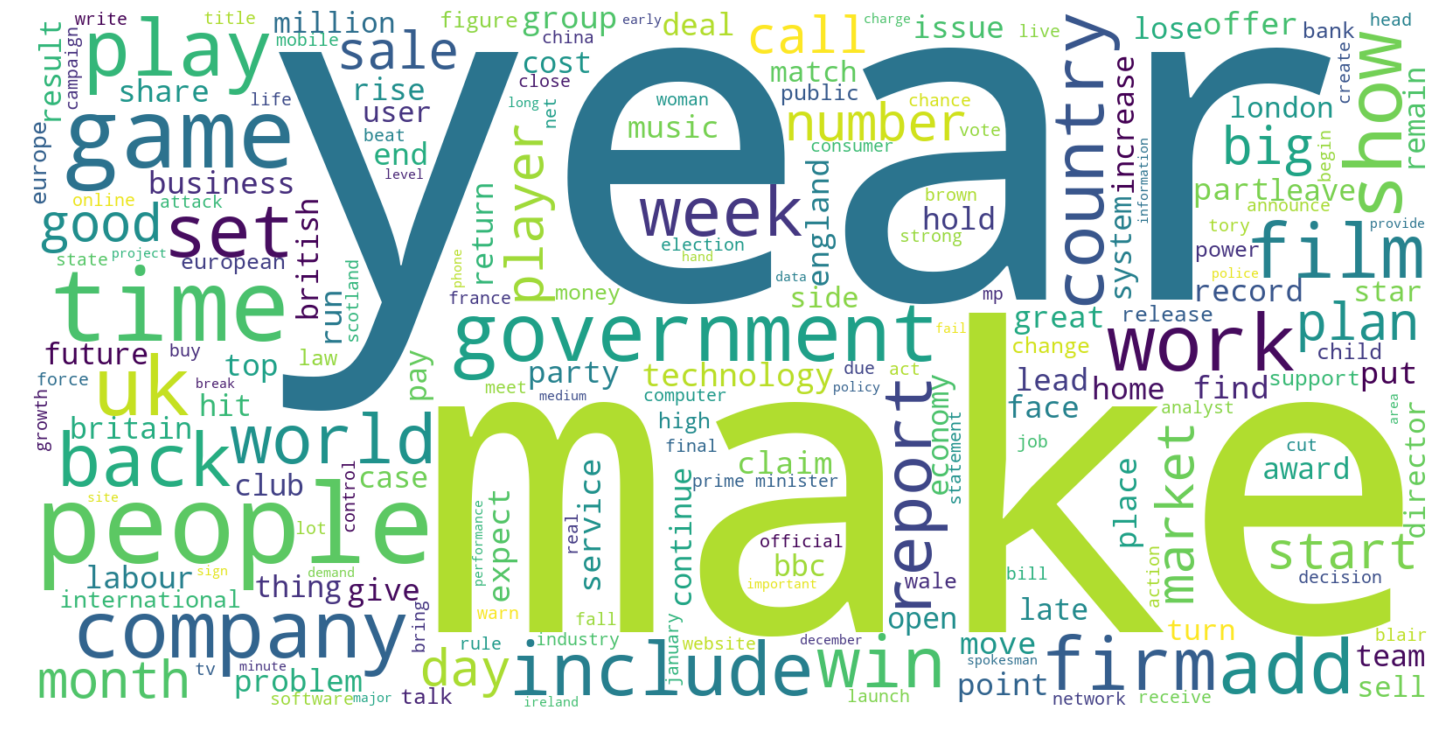

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# returning the string elements that were joined earlier on in combined to form a list
joined_list = (' ').join(combined) 
    
# wordcloud layouts
wordcloud_plot = WordCloud(width=1600, height=800, background_color='white').generate(joined_list)
plt.figure( figsize=(20,10),facecolor= None)
plt.imshow(wordcloud_plot, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plotting the figure 
plt.show()

### Most Common Words

We then plot the top 10 most common words within the tokenized column using word_frequency.most_common(10) in order to get the top 10 most frequent words for the tokens lemmatized column. We then use a graph to visually visualise this.


Most frequent top-10 words:
 [('year', 1958), ('make', 1558), ('people', 1452), ('game', 1128), ('time', 1002), ('â', 981), ('world', 879), ('government', 837), ('film', 805), ('show', 785)]


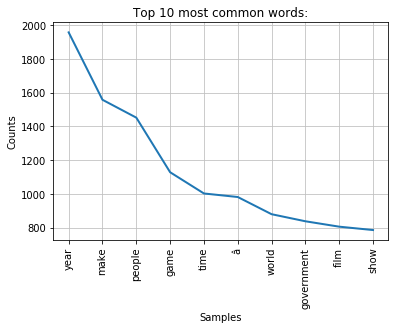

In [61]:
word_frequency = nltk.FreqDist(combined)
# Getting the most common words but specifying it to 10 only.
print("\nMost frequent top-10 words:\n",word_frequency.most_common(10))
word_frequency.plot(10, title='Top 10 most common words:')

## Part 3: From Clean Representation of Documents to Numerical Representation Vectors

Creating a new column then dataframe Category which contains every category

In [62]:
df['category_id'] = df['category'].factorize()[0]

df['category_id'][0:10]

0    0
1    1
2    2
3    3
4    3
5    3
6    3
7    4
8    2
9    4
Name: category_id, dtype: int64

In [63]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')

In [64]:
category_id_df

,category,category_id
0,business,0
1,tech,1
2,politics,2
3,entertainment,3
7,sport,4


In [65]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [66]:
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'entertainment', 4: 'sport'}

In [67]:
# Pick 10 random samples from the dataframe
df.sample(10, random_state=0)

,content,category,tokens,noun_Tokens,tokens_lemmatized,category_id
319,"Streets have 'album of the year' The Streets, ...",entertainment,"[streets, album, year, streets, aka, british, ...","[Streets, album, year, Streets, rapper, songwr...","[street, album, year, street, aka, british, ra...",3
1264,Britons fed up with net service A survey condu...,tech,"[britons, fed, net, service, survey, conducted...","[Britons, service, A, survey, PC, Pro, Magazin...","[briton, feed, net, service, survey, conduct, ...",1
798,Poles play with GameBoy 'blip_pop' A group of ...,tech,"[poles, play, gameboy, blip_pop, group, artist...","[Poles, GameBoy, A, group, artists, Poland, ca...","[pole, play, gameboy, blippop, group, artists,...",1
579,"School sport 'is back', says PM Tony Blair has...",politics,"[school, sport, back, pm, tony, blair, promise...","[School, sport, PM, Tony, Blair, sport, priori...","[school, sport, back, pm, tony, blair, promise...",2
414,Saab to build Cadillacs in Sweden General Moto...,business,"[saab, build, cadillacs, sweden, general, moto...","[Saab, Cadillacs, Sweden, General, Motors, wor...","[saab, build, cadillacs, sweden, general, moto...",0
494,Bening makes awards breakthrough Film actress ...,entertainment,"[bening, makes, awards, breakthrough, film, ac...","[Bening, awards, Film, actress, Annette, Benin...","[bening, make, award, breakthrough, film, actr...",3
618,Hearts of Oak 3_2 Cotonsport Hearts of Oak set...,sport,"[hearts, oak, 3_2, cotonsport, hearts, oak, se...","[Hearts, Oak, Cotonsport, Hearts, Oak, Confede...","[heart, oak, cotonsport, heart, oak, set, ghan...",4
1151,Microsoft debuts security tools Microsoft is r...,tech,"[microsoft, debuts, security, tools, microsoft...","[Microsoft, security, tools, Microsoft, tools,...","[microsoft, debut, security, tool, microsoft, ...",1
1257,Musicians to tackle US red tape Musicians' gro...,entertainment,"[musicians, tackle, red, tape, musicians, grou...","[Musicians, US, tape, Musicians, groups, US, v...","[musician, tackle, red, tape, musician, group,...",3
530,Madagascar completes currency switch Madagasca...,business,"[madagascar, completes, currency, switch, mada...","[Madagascar, currency, switch, Madagascar, rep...","[madagascar, complete, currency, switch, madag...",0


In [68]:
df.groupby('category').category_id.count()

category
business         356
entertainment    266
politics         292
sport            361
tech             282
Name: category_id, dtype: int64

In [69]:
# Remember the dictionary created to map category names to a number ? 
category_to_id.items()

dict_items([('business', 0), ('tech', 1), ('politics', 2), ('entertainment', 3), ('sport', 4)])

In [70]:
sorted(category_to_id.items())

[('business', 0),
 ('entertainment', 3),
 ('politics', 2),
 ('sport', 4),
 ('tech', 1)]

#### TFIDF

We will now create a numerical representation of the documents to a numerical representation of vectors. We will use TFIDF from sklearn modules. 
TF-IDF stands for Term Frequency-Inverse Document Frequency. It is defined as follows:
$$ TFIDF(term) = TF * IDF $$

$$ TF(term, document) = \frac{frequency(term)}{length(document)} $$

$$ IDF(term) = \frac{number\;of\;documents\;containing\;term}{number\;of\;documents\;in\;corpus} $$

The words that appear more frequently will have a higher TF value. Words that have a higher importance will have a higher IDF value within the matrix. The TFIDF balances the TF and the IDF values in order to find the most important words within the column.

In [71]:
tfidf_vectorizer = TfidfVectorizer(norm=None)  
list_contents =[]
for index, row in df.iterrows():
    list_contents.append(' '.join(row.tokens))
    


tfidf_matrix = tfidf_vectorizer.fit_transform(list_contents)
features = pd.DataFrame(tfidf_matrix.toarray(),columns=[tfidf_vectorizer.get_feature_names()])

labels = df.category_id

features.head(10)

,000_300,000_a_year,000_acre,000_seater,000_strong,000_vote,000m,000s,000th,001and,...,zones,zoom,zooms,zooropa,zornotza,zubair,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see from TFIDF matrix above many of the values are 0. The 0 vector value within the matrix represents that the words are not appearing in the document at all. The weights of the terms that occur in the document is proportional to the term frequency.

In [72]:
features.shape 

(1557, 26764)

As seen above from the results of the shape we can see the number of rows x columns in our matrix for the TFIDF.

## Part 4: Model Learning and Analysis of the model and Model Evaluation and Discussion

## Classification Model

We wanted to test as many classification models as we could, in order to get the best possible training model. The classifiers that were tested we:
* Logistic regression
* Random Forest
* Multinomial Naive Bayes
* K Means Classifier
* Ridge Classifier

From these we should be able to find the model with the highest accuracy. We first store them into a list called models. 

We first want to declare our cross-validation number. We have chosen the value 5. Cross-validation assesses how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

In [73]:
cross_validation = 5

### Random Forest Classification

The first classifier we tested was the random forest classificator. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. We decided to test it on our training set with a number of different parameters:
* Tree depth of 3, 5, 10 and 1000 with 200 estimators
* Tree depth of 1000 with 300 estimators
* Tree depth of 1000 with 1000 estimators

We aimed to get a good analysis of what makes the random forest perform better

In [74]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0),
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0),
    RandomForestClassifier(n_estimators=200, max_depth=1000, random_state=0),
    RandomForestClassifier(n_estimators=300, max_depth=1000, random_state=0),
    RandomForestClassifier(n_estimators=1000, max_depth=1000, random_state=0),
]

We created a new dataframe called df_random. This would contain the data in the range of the models times each fold, which is 5 in our case. We also created an empty list, called 'lists', which will be used further down. 

In [75]:
df_random = pd.DataFrame(index=range(cross_validation * len(models))) #the results of the 6 validations for each different parameter are stored here
lists = [] #empty list

We then loop through each model, classifier is our name format, and acc calculates the performance of the classifier. The classifer, fold number and accuracy of the model is all appended to the empty list that was declared above. 

In [76]:
for model in models:
    classifier = model.__class__.__name__
    acc = cross_val_score(model, features, labels, scoring='accuracy', cv=cross_validation)
    
    for cv_no, accuracy in enumerate(acc):
        lists.append((cv_no, classifier, accuracy)) #the accuracy are appended to the empty 'lists' list above

In [77]:
time_RF = %timeit model

23.1 ns ± 0.204 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [78]:
df_random = pd.DataFrame(lists, columns=['cv_no', 'classifier', 'accuracy']) #stored in a dataframe

The average mean result of the classifier is 91.9%. This is quite a good result. Over 9/10 of articles are correctly categorised into one of our 5 topics. Is this sufficient? We didn't think so, which is why more classifiers were required. 

In [79]:
df_random.groupby('classifier').accuracy.mean()

classifier
RandomForestClassifier    0.921125
Name: accuracy, dtype: float64

We analyse the results of each fold...

In [80]:
df_random

,cv_no,classifier,accuracy
0,0,RandomForestClassifier,0.812698
1,1,RandomForestClassifier,0.820513
2,2,RandomForestClassifier,0.803226
3,3,RandomForestClassifier,0.819355
4,4,RandomForestClassifier,0.803226
5,0,RandomForestClassifier,0.879365
6,1,RandomForestClassifier,0.891026
7,2,RandomForestClassifier,0.887097
8,3,RandomForestClassifier,0.890323
9,4,RandomForestClassifier,0.893548


When we increased max_depth the performance of the tree increased. When it was 1000 the average was up around 95%. We then compared n_estimators. There wasn't a great deal of difference but n_estimators was equal to 200 the best result was produced. 

* Average of RandomForestClassifier(n_estimators=200, max_depth=1000, random_state=0) = 0.9589192
* Average of RandomForestClassifier(n_estimators=300, max_depth=1000, random_state=0) = 0.9582944
* Average of RandomForestClassifier(n_estimators=1000, max_depth=1000, random_state=0) = 0.9576452

### Multinomial Naive Bayes

The second classifier we tested was the multinomial Naive Bayes classifier. Naive Bayes is a family of algorithms based on applying Bayes theorem with a strong(naive) assumption, that every feature is independent of the others, in order to predict the category of a given sample. They are probabilistic classifiers, therefore will calculate the probability of each category using Bayes theorem, and the category with the highest probability will be output. We did not have to change any parameters when testing this method.

In [81]:
models = [
       MultinomialNB()
]

Again we declare our new dataframe...

In [82]:
df_naive = pd.DataFrame(index=range(cross_validation * len(models))) 
lists = []

And our bayes model is calculated in terms of accuracy...

In [83]:
for model in models:
    classifier = model.__class__.__name__
    acc = cross_val_score(model, features, labels, scoring='accuracy', cv=cross_validation)
    for cv_no, accuracy in enumerate(acc):
        lists.append((cv_no, classifier, accuracy))

In [84]:
time_NB = %timeit model

20.2 ns ± 0.398 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


We put our results into a dataframe

In [85]:
df_naive = pd.DataFrame(lists, columns=['cv_no', 'classifier', 'accuracy'])

We then find the overall average accuracy of the classifier. The Naive Bayes Classifier has an accuracy of over 97%. These are very good results in terms of classification. 

In [86]:
df_naive.groupby('classifier').accuracy.mean()

classifier
MultinomialNB    0.971091
Name: accuracy, dtype: float64

We then look at the results for each fold...

In [87]:
df_naive

,cv_no,classifier,accuracy
0,0,MultinomialNB,0.968254
1,1,MultinomialNB,0.983974
2,2,MultinomialNB,0.967742
3,3,MultinomialNB,0.961290
4,4,MultinomialNB,0.974194


The results vary from 0.965 to 0.987. Overall the Multinomial Naive Bayes classifier gives very good and satisfying results. 

### Logistic Regression

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. We investigate whether changing the random_state parameter has an effect on the result.

In [88]:
models = [
    LogisticRegression(random_state=0),
    LogisticRegression(random_state=1),
    LogisticRegression(random_state=2)
]

Again, we load the range into a dataframe and create our list. 

In [89]:
df_log = pd.DataFrame(index=range(cross_validation * len(models)))
lists = [] 

The accuracy is calculated in the same way as above

In [90]:
for model in models:
    classifier = model.__class__.__name__
    acc = cross_val_score(model, features, labels, scoring='accuracy', cv=cross_validation)
    for cv_no, accuracy in enumerate(acc):
        lists.append((cv_no, classifier, accuracy))

In [91]:
time_LR = %timeit model

25.8 ns ± 12.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Our results are stored in the dataframe

In [92]:
df_log = pd.DataFrame(lists, columns=['cv_no', 'classifier', 'accuracy'])

The results are also very good for the logistic regression. The average mean is 97%, which again is very good results in terms of classification. 

In [93]:
df_log.groupby('classifier').accuracy.mean()

classifier
LogisticRegression    0.971777
Name: accuracy, dtype: float64

We see interesting results when we look at the separate folds. We have three seperate forms of the logistic regression. When the cv_no is 0, it signals the start of a new parameter. The first 0 to 4 deals with logistic regression with random_state = 0. Our low is 0.949 and high is 0.987. We then look at random_state=1. The interesting aspect of these results is that changing the random state to 1 actually made no difference to the results. We decided to test this again, with random_state = 2, and once again we got the same results. The results for each fold are still very good. 

In [94]:
df_log

,cv_no,classifier,accuracy
0,0,LogisticRegression,0.955556
1,1,LogisticRegression,0.983974
2,2,LogisticRegression,0.970968
3,3,LogisticRegression,0.964516
4,4,LogisticRegression,0.983871
5,0,LogisticRegression,0.955556
6,1,LogisticRegression,0.983974
7,2,LogisticRegression,0.970968
8,3,LogisticRegression,0.964516
9,4,LogisticRegression,0.983871


### Ridge Classification

Ridge regression is an extension for linear regression. It’s basically a regularized linear regression model. It has two main benefits. First, adding a penalty term reduces overfitting. Second, the penalty term guarantees that we can find a solution. RidgeClassifierCV() is a ridge classifier with built in cross validation

In [95]:
models = [
       RidgeClassifierCV()
]

Method from before is repeated...

In [96]:
df_ridge = pd.DataFrame(index=range(cross_validation * len(models)))
lists = [] 

In [97]:
for model in models:
    classifier = model.__class__.__name__
    acc = cross_val_score(model, features, labels, scoring='accuracy', cv=cross_validation)
    for cv_no, accuracy in enumerate(acc):
        lists.append((cv_no, classifier, accuracy))

In [98]:
time_RC = %timeit model

20.4 ns ± 0.185 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [99]:
df_ridge = pd.DataFrame(lists, columns=['cv_no', 'classifier', 'accuracy'])

The ridge classifier also produces quite good results. On average, the ridge classifier (with cross validation) gives an accuracy of 95.7%. 

In [100]:
df_ridge.groupby('classifier').accuracy.mean()

classifier
RidgeClassifierCV    0.960234
Name: accuracy, dtype: float64

When we look at each fold we get the following results...
The low is 94.6 and the high is 96.1. We notice that fold 2, 3 and 4 all output the same number. This is perhaps due to the built in CV. 

In [101]:
df_ridge

,cv_no,classifier,accuracy
0,0,RidgeClassifierCV,0.942857
1,1,RidgeClassifierCV,0.961538
2,2,RidgeClassifierCV,0.961290
3,3,RidgeClassifierCV,0.961290
4,4,RidgeClassifierCV,0.974194


### KNN

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space.

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. We wanted to see which value of k gave the best results, so we tested it for 1, 2, 3, 4, 5 and 10. 

In [102]:
models = [
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=2),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=4),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=10)
]

Usual process..

In [103]:
df_kmeans = pd.DataFrame(index=range(cross_validation * len(models))) 
lists = [] 

In [104]:
for model in models:
    classifier = model.__class__.__name__
    acc = cross_val_score(model, features, labels, scoring='accuracy', cv=cross_validation)
    for cv_no, accuracy in enumerate(acc):
        lists.append((cv_no, classifier, accuracy))

In [105]:
time_KNN = %timeit model

21.2 ns ± 1.06 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [106]:
df_kmeans = pd.DataFrame(lists, columns=['cv_no', 'classifier', 'accuracy']) 

Our results for the kneighbor classifer are not as desired. They average only above 56%, which is not a satisfactory result for classification. 

In [107]:
df_kmeans.groupby('classifier').accuracy.mean()

classifier
KNeighborsClassifier    0.50431
Name: accuracy, dtype: float64

When we compare the value of k, the value of k=2 gave the best results. From there as k got higher the accuracy got lower. Despiite 2 neighbors being the best classification, it is still nowhere near other classifiers we have tested. 

In [108]:
df_kmeans

,cv_no,classifier,accuracy
0,0,KNeighborsClassifier,0.577778
1,1,KNeighborsClassifier,0.612179
2,2,KNeighborsClassifier,0.564516
3,3,KNeighborsClassifier,0.600000
4,4,KNeighborsClassifier,0.641935
5,0,KNeighborsClassifier,0.625397
6,1,KNeighborsClassifier,0.631410
7,2,KNeighborsClassifier,0.580645
8,3,KNeighborsClassifier,0.629032
9,4,KNeighborsClassifier,0.696774


We then wanted to test the KNeighbors Regressor to see if that gave us better results. We checked for n_neighbors = 1.

In [109]:
models = [
    KNeighborsRegressor(n_neighbors=1)
]

Usual process..

In [110]:
df_kreg = pd.DataFrame(index=range(cross_validation * len(models)))
lists = [] 

In [111]:
for model in models:
    classifier = model.__class__.__name__
    acc = cross_val_score(model, features, labels, scoring='f1_macro', cv=cross_validation)
    for cv_no, accuracy in enumerate(acc):
        lists.append((cv_no, classifier, accuracy))

In [112]:
time_KNR = %timeit model

20.3 ns ± 0.502 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [113]:
df_kreg = pd.DataFrame(lists, columns=['cv_no', 'classifier', 'accuracy'])

Once again the accuracy wasn't as high as desired. Just over 64% is not near satusfactory enough, and again far lower than some other classifiers. 

In [114]:
df_kreg.groupby('classifier').accuracy.mean()

classifier
KNeighborsRegressor    0.604033
Name: accuracy, dtype: float64

In [115]:
df_kreg

,cv_no,classifier,accuracy
0,0,KNeighborsRegressor,0.576014
1,1,KNeighborsRegressor,0.618184
2,2,KNeighborsRegressor,0.581289
3,3,KNeighborsRegressor,0.598201
4,4,KNeighborsRegressor,0.646474


### Which classifier performs best?

So having each classifier with different parameters we have chosen the best ones from each in order to find our most suitable classifier. We have discounted k-means already as their performance was very poor. We are left with:
* RandomForestClassifier(n_estimators=200, max_depth=1000, random_state=0)
* MultinomialNB()
* LogisticRegression(random_state=0)
* RidgeClassifierCV()


We use the same method as before, and store them all in the same 'models' list.

In [116]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=1000, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    RidgeClassifierCV()
]

This time we store the data of the models in a dataframe called df_class

In [117]:
df_class = pd.DataFrame(index=range(cross_validation * len(models))) #the results of the 5 validations for each 4 models are stored here
lists = [] #empty list

The same method is used as before. 

In [118]:
for model in models:
    classifier = model.__class__.__name__
    acc = cross_val_score(model, features, labels, scoring='accuracy', cv=cross_validation)
    for cv_no, accuracy in enumerate(acc):
        lists.append((cv_no, classifier, accuracy))

In [119]:
df_class = pd.DataFrame(lists, columns=['cv_no', 'classifier', 'accuracy']) #stored in a dataframe

The mean accuracies are very interesting. They rank the classifiers in the following order:
* 1 Logistic Regression
* 2 MultinomialNB
* 3 Random Forest Classifier
* 4 Ridge Classifier

Naive Bayes and Logistic Regression are very close in terms of percentage, with 97.1091% and 97.177% respectively. However, as the number of documents get larger and larger that 0.4% difference could become very significant.

In [120]:
df_class.groupby('classifier').accuracy.mean()

classifier
LogisticRegression        0.971777
MultinomialNB             0.971091
RandomForestClassifier    0.960822
RidgeClassifierCV         0.960234
Name: accuracy, dtype: float64

When we look at the cross_validation results we see Random Forest got a high of 0.97 and low of 0.94. Naive Bayes got a high of 0.98 and low of 0.965. Logistic Regression got a high of 0.98 and low of 0.94. Ridge Classifier got a high of 0.96 and low of 0.94. Overall, each of the four classifiers performed well, but Naive Bayes was the best one

In [121]:
df_class

,cv_no,classifier,accuracy
0,0,RandomForestClassifier,0.955556
1,1,RandomForestClassifier,0.974359
2,2,RandomForestClassifier,0.958065
3,3,RandomForestClassifier,0.951613
4,4,RandomForestClassifier,0.964516
5,0,MultinomialNB,0.968254
6,1,MultinomialNB,0.983974
7,2,MultinomialNB,0.967742
8,3,MultinomialNB,0.961290
9,4,MultinomialNB,0.974194


Therefore, we chose to apply Multinomial Naive Bayes to the test data set

In [122]:
%timeit MultinomialNB

18.7 ns ± 0.639 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [123]:
%timeit LogisticRegression

18.3 ns ± 0.479 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [124]:
%timeit RandomForestClassifier  

18.1 ns ± 0.192 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [125]:
%timeit RidgeClassifierCV

20.5 ns ± 0.199 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Part 5: Model Accuracy on Test Data

Here we decided to use the MultinomialNB model with a certain proportions of the data which is randomly chosen for testing

### Split Data Model Results 25%

In [126]:
from sklearn.model_selection import train_test_split

model = MultinomialNB()

 
x_train_data, x_test_data, y_train_data, y_test_data, indices_train_data, indices_test_data = train_test_split(features, labels, df.index, test_size=0.25, random_state=0)

#Use the fit function to train the model
model.fit(x_train_data, y_train_data)

y_prediction = model.predict(x_test_data)#Storing the predictions
y_prediction_prob = model.predict_proba(x_test_data)#Storing the probablilities


We can then use this data to produce a confusion matrix by also using seaborn

Text(0.5, 1.0, 'Confusion Matrix')

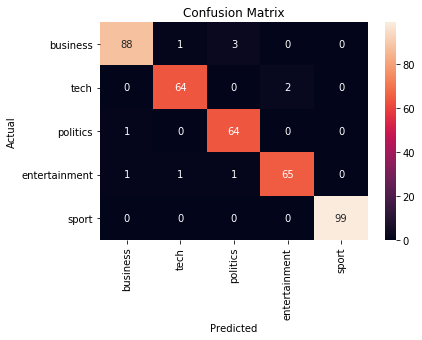

In [127]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt # plotting graphs

con_matrix = confusion_matrix(y_test_data, y_prediction)
sns.heatmap(con_matrix, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

We first tested it for 25% of the training data and this produced the above confusion matrix. For business documents 88 of them were classified correctlty, while one was classified as tech, and three were classified as politics. These are undestandable mistakes to make as the business and tech may overlap when talking about a company, and business and politics could overlap when discussing money figures and the rise of minimum wage, etc.

64 documents were classified correctly as tech, while 2 tech documents were classified as being entertainment. Again, this is completely understandable as the documents could have been aboult game consoles or something of that sort, which would fall into both categories. 

64 documents were correctly classified as politics, with one politics document classified as business. Again, this would be due to the overlap we previously eluded to. 

For entertainment, 65 documents were classified correctly, with 1 being classified as politics, 1 as tech and 1 as business. Entertainment and politics is a strange overlap. It could be due to somebody in the entertainment business that has gone into politics or perhaps prefer to the acting career of Donald Trump. 

All sport documents were classified correctly. 

Overall, in this quarter split of the data there were 390 documents, 380 were classfified correctly and 10 were incorrect. This gives a percentage of 97.436% documents correctly classified.

We now look at instances where an sample may be incorrectly classified by the same method in multiple instances

In [128]:
from IPython.display import display

#loop through each prediction
for prediction_label in category_id_df.category_id:
  for actual_label in category_id_df.category_id:
    #If they were misclassified at least once
    if prediction_label != actual_label and con_matrix[actual_label, prediction_label] >= 1:
      #Print out the topic and the number of examples
      print("'{}' was predicted as '{}' : Num of examples = {} ".format(id_to_category[actual_label], id_to_category[prediction_label], con_matrix[actual_label, prediction_label]))
      #Display the example(s)
      display(df.loc[indices_test_data[(y_test_data == actual_label) & (y_prediction == prediction_label)]]['tokens'])
      

'politics' was predicted as 'business' : Num of examples = 1 


218    [blair, told, double, overseas, aid, tony, bla...
Name: tokens, dtype: object

'entertainment' was predicted as 'business' : Num of examples = 1 


1306    [uk, national, gallery, pink, national, galler...
Name: tokens, dtype: object

'business' was predicted as 'tech' : Num of examples = 1 


1390    [brussels, raps, mobile, call, charges, europe...
Name: tokens, dtype: object

'entertainment' was predicted as 'tech' : Num of examples = 1 


966    [pupils, anti_piracy, lessons, lessons, music,...
Name: tokens, dtype: object

'business' was predicted as 'politics' : Num of examples = 3 


678     [pension, hitch, long_living, men, male, life,...
1371    [firms, pump, billions, pensions, employers, s...
1057    [giving, financial, gifts, children, child, gr...
Name: tokens, dtype: object

'entertainment' was predicted as 'politics' : Num of examples = 1 


1257    [musicians, tackle, red, tape, musicians, grou...
Name: tokens, dtype: object

'tech' was predicted as 'entertainment' : Num of examples = 2 


1063    [web, radio, takes, spanish, rap, global, spin...
1014    [players, sought, 1m, prize, uk, gamers, chanc...
Name: tokens, dtype: object

### Split Data Model Results 50%

In [129]:
from sklearn.model_selection import train_test_split

model = MultinomialNB()

 
x_train_data, x_test_data, y_train_data, y_test_data, indices_train_data, indices_test_data = train_test_split(features, labels, df.index, test_size=0.5, random_state=0)

#Use the fit function to train the model
model.fit(x_train_data, y_train_data)

y_prediction = model.predict(x_test_data)#Storing the predictions
y_prediction_prob = model.predict_proba(x_test_data)#Storing the probablilities


We can then use this data to produce a confusion matrix by also using seaborn. This will give us a matrix with varying colours depending on the number in the each 'square'. We expect the number to be large when a topic is comparing itself, but not when its being compared to a different topic

Text(0.5, 1.0, 'Confusion Matrix')

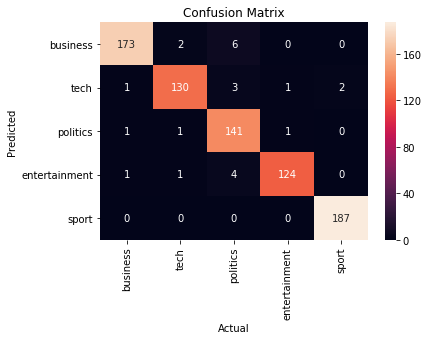

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt # plotting graphs

con_matrix = confusion_matrix(y_test_data, y_prediction)
sns.heatmap(con_matrix, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')

We then tested it for 50% of the training data and this produced the above confusion matrix. For business documents 173 of them were classified correctlty, while two were classified as tech, and six was classified as politics. Again, as I eluded to before these are undestandable mistakes to make as the business and tech, as well as business and politics, may overlap. The peculiar this is that both mistake frequencies have doubled when we doubled the training data.

130 documents were classified correctly as tech, one document as business, three as politics, one as entertainment and two as sport. Again, this is completely understandable as tech is so broad that it can easily be discussed when writing about the other topics.

141 documents were correctly classified as politics, with one politics document classified as business, one as tech and one as entertainment. Again, this would be due to the overlap we previously eluded to.

For entertainment, 124 documents were classified correctly, with 4 being classified as politics, 1 as tech and 1 as business. Entertainment and politics overlaps four times. It is becoming incresingly likely that this has got something to do with Donald Trump. Or perhaps, people are finding the Brexit situation particularly entertaining.

All 187 sport documents were classified correctly apart from 2. This is probably due to the growing importance tech has in sport and performance. Even with these two incorrect documents, sport is clearly the most unique document.

Overall, in this half split of the data there were 779 documents, 755 were classified correctly and 24 were incorrect. This gives a percentage of 96.919% documents correctly classified. This is a marginal drop from the first quarter sample.

We now look at instances where an sample may be incorrectly classified by the same method in multiple instances

In [131]:
from IPython.display import display

#loop through each prediction
for prediction_label in category_id_df.category_id:
  for actual_label in category_id_df.category_id:
    #If they were misclassified at least once
    if prediction_label != actual_label and con_matrix[actual_label, prediction_label] >= 1:
      #Print out the topic and the number of examples
      print("'{}' was predicted as '{}' : Num of examples = {} ".format(id_to_category[actual_label], id_to_category[prediction_label], con_matrix[actual_label, prediction_label]))
      #Display the example(s)
      display(df.loc[indices_test_data[(y_test_data == actual_label) & (y_prediction == prediction_label)]]['tokens'])
      

'tech' was predicted as 'business' : Num of examples = 1 


880    [anti_spam, laws, bite, spammer, hard, net, se...
Name: tokens, dtype: object

'politics' was predicted as 'business' : Num of examples = 1 


218    [blair, told, double, overseas, aid, tony, bla...
Name: tokens, dtype: object

'entertainment' was predicted as 'business' : Num of examples = 1 


1306    [uk, national, gallery, pink, national, galler...
Name: tokens, dtype: object

'business' was predicted as 'tech' : Num of examples = 2 


1390    [brussels, raps, mobile, call, charges, europe...
654     [bt, offers, equal, access, rivals, bt, moved,...
Name: tokens, dtype: object

'politics' was predicted as 'tech' : Num of examples = 1 


1451    [drive, save, festive, holidays, efforts, made...
Name: tokens, dtype: object

'entertainment' was predicted as 'tech' : Num of examples = 1 


966    [pupils, anti_piracy, lessons, lessons, music,...
Name: tokens, dtype: object

'business' was predicted as 'politics' : Num of examples = 6 


678     [pension, hitch, long_living, men, male, life,...
1371    [firms, pump, billions, pensions, employers, s...
1057    [giving, financial, gifts, children, child, gr...
186     [call, save, manufacturing, jobs, trades, unio...
1494    [saudi, ministry, employ, women, women, employ...
405     [soros, group, warns, kazakh, close, open, soc...
Name: tokens, dtype: object

'tech' was predicted as 'politics' : Num of examples = 3 


539    [ink, helps, drive, democracy, asia, kyrgyz, r...
540    [online, commons, spark, debate, online, commu...
338    [remote, control, rifle, range, debuts, huntin...
Name: tokens, dtype: object

'entertainment' was predicted as 'politics' : Num of examples = 4 


1257    [musicians, tackle, red, tape, musicians, grou...
211     [tv, show, unites, angolan, families, angolan,...
431     [jackson, film, absolute, disaster, pr, expert...
13      [women, film, earning, women, uk, film, indust...
Name: tokens, dtype: object

'tech' was predicted as 'entertainment' : Num of examples = 1 


1063    [web, radio, takes, spanish, rap, global, spin...
Name: tokens, dtype: object

'politics' was predicted as 'entertainment' : Num of examples = 1 


183    [uk, helps, raped, rwandan, women, britain, gi...
Name: tokens, dtype: object

'tech' was predicted as 'sport' : Num of examples = 2 


54      [football, manager, scores, big, time, past, d...
1014    [players, sought, 1m, prize, uk, gamers, chanc...
Name: tokens, dtype: object

### Split Data Model Results 75%

We use the same code as before except this time we use 75% of the training set 

In [132]:
from sklearn.model_selection import train_test_split

model = MultinomialNB()

 
x_train_data, x_test_data, y_train_data, y_test_data, indices_train_data, indices_test_data = train_test_split(features, labels, df.index, test_size=0.75, random_state=0)


model.fit(x_train_data, y_train_data)

y_prediction = model.predict(x_test_data)
y_prediction_prob = model.predict_proba(x_test_data)


We can then use this data to produce a confusion matrix by also using seaborn

Text(0.5, 1.0, 'Confusion Matrix')

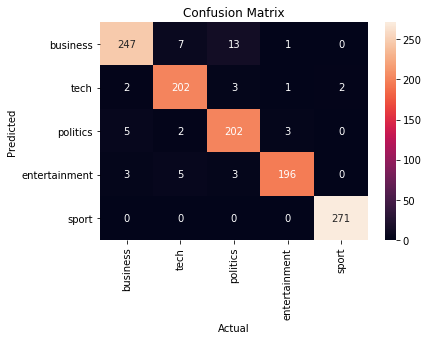

In [133]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt # plotting graphs

con_matrix = confusion_matrix(y_test_data, y_prediction)
sns.heatmap(con_matrix, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title("Confusion Matrix")

We then tested it for 75% of the training data and this produced the above confusion matrix. For business documents 247 of them were classified correctlty, while seven were classified as tech, one was classified as business and thirteen were classified as politics. Again, as I eluded to before these are undestandable mistakes to make as the business and tech, as well as business and politics, may overlap. Entertainment and business is a new overlap, and this could be due a document about the money made in the entertainment industry.   

202 documents were classified correctly as tech, two documents as business, three as politics, one as entertainment and two as sport. Again, this is completely understandable as tech is so broad that it can easily be discussed when writing about the other topics. 

202 documents were correctly classified as politics, with five politics documents classified as business, two as tech and three as entertainment. Again, this would be due to the overlap we previously eluded to. 

For entertainment, 196 documents were classified correctly, with three being classified as politics, five as tech and three as business. Entertainment and politics overlaps three times here whereas it was four for the half split. This just shows there is a close relationship between the two topics. 

All 271 sport documents were classified correctly apart from 2 again. It is certainly the most unique topic. 

Overall, in this half split of the data there were 1168 documents, 1118 were classfified correctly and 50 were incorrect. This gives a percentage of 95.719% documents correctly classified. This is a marginal drop from the first quarter sample.

We now look at instances where an sample may be incorrectly classified by the same method in multiple instances

In [134]:
from IPython.display import display

#loop through each prediction
for prediction_label in category_id_df.category_id:
  for actual_label in category_id_df.category_id:
    #If they were misclassified at least once
    if prediction_label != actual_label and con_matrix[actual_label, prediction_label] >= 1:
      #Print out the topic and the number of examples
      print("'{}' was predicted as '{}' : Num of examples = {} ".format(id_to_category[actual_label], id_to_category[prediction_label], con_matrix[actual_label, prediction_label]))
      #Display the example(s)
      display(df.loc[indices_test_data[(y_test_data == actual_label) & (y_prediction == prediction_label)]]['tokens'])
      

'tech' was predicted as 'business' : Num of examples = 2 


240    [fast, lifts, rise, record, books, high_speed,...
880    [anti_spam, laws, bite, spammer, hard, net, se...
Name: tokens, dtype: object

'politics' was predicted as 'business' : Num of examples = 5 


218    [blair, told, double, overseas, aid, tony, bla...
688    [brown, outline, presidency, goals, year, make...
330    [turkey, deal, world, peace, deal, bringing, t...
266    [blair, hails, turkey_eu, talks, deal, tony, b...
71     [brown, calls, â, 5bn, aids, fund, gordon, bro...
Name: tokens, dtype: object

'entertainment' was predicted as 'business' : Num of examples = 3 


1306    [uk, national, gallery, pink, national, galler...
217     [wal_mart, sued, rude, lyrics, parents, 13_yea...
989     [row, threatens, hendrix, museum, plan, propos...
Name: tokens, dtype: object

'business' was predicted as 'tech' : Num of examples = 7 


817     [bmw, cash, fuel, mini, production, years, min...
1442    [kraft, cuts, snack, ads, children, kraft, pla...
1390    [brussels, raps, mobile, call, charges, europe...
654     [bt, offers, equal, access, rivals, bt, moved,...
236     [vodafone, appoints, japan, boss, vodafone, dr...
1317    [electronics, firms, eye, plasma, deal, consum...
698     [making, office, work, mission, brighten, work...
Name: tokens, dtype: object

'politics' was predicted as 'tech' : Num of examples = 2 


1451    [drive, save, festive, holidays, efforts, made...
213     [uk, firms, embracing, e_commerce, uk, firms, ...
Name: tokens, dtype: object

'entertainment' was predicted as 'tech' : Num of examples = 5 


966     [pupils, anti_piracy, lessons, lessons, music,...
608     [artists, secret, postcards, sale, postcards, ...
561     [media, battle, bafta, awards, bbc, leads, nom...
1103    [uk, world, biggest, music, buyer, uk, consume...
226     [bbc, scrutiny, mps, urged, bbc, give, watchdo...
Name: tokens, dtype: object

'business' was predicted as 'politics' : Num of examples = 13 


678     [pension, hitch, long_living, men, male, life,...
1371    [firms, pump, billions, pensions, employers, s...
1211    [monsanto, fined, 5m, bribery, agrochemical, g...
1154    [wal_mart, fights, back, accusers, big, names,...
1057    [giving, financial, gifts, children, child, gr...
186     [call, save, manufacturing, jobs, trades, unio...
1494    [saudi, ministry, employ, women, women, employ...
1042    [green, reports, shun, supply, chain, uk, top,...
405     [soros, group, warns, kazakh, close, open, soc...
993     [cannabis, hopes, drug, firm, prescription, ca...
864     [regulator, rule, pain, drug, food, drug, regu...
1470    [golden, rule, intact, ex_aide, chancellor, go...
856     [world, leaders, gather, face, uncertainty, bu...
Name: tokens, dtype: object

'tech' was predicted as 'politics' : Num of examples = 3 


539     [ink, helps, drive, democracy, asia, kyrgyz, r...
338     [remote, control, rifle, range, debuts, huntin...
1436    [iran, jails, blogger, years, iranian, weblogg...
Name: tokens, dtype: object

'entertainment' was predicted as 'politics' : Num of examples = 3 


211    [tv, show, unites, angolan, families, angolan,...
13     [women, film, earning, women, uk, film, indust...
339    [uganda, bans, vagina, monologues, uganda, aut...
Name: tokens, dtype: object

'business' was predicted as 'entertainment' : Num of examples = 1 


1360    [tate, lyle, boss, bags, top, award, tate, lyl...
Name: tokens, dtype: object

'tech' was predicted as 'entertainment' : Num of examples = 1 


1063    [web, radio, takes, spanish, rap, global, spin...
Name: tokens, dtype: object

'politics' was predicted as 'entertainment' : Num of examples = 3 


183    [uk, helps, raped, rwandan, women, britain, gi...
261    [howard, truanted, play, snooker, conservative...
337    [royal, couple, watch, nation, mood, prince, c...
Name: tokens, dtype: object

'tech' was predicted as 'sport' : Num of examples = 2 


54      [football, manager, scores, big, time, past, d...
1014    [players, sought, 1m, prize, uk, gamers, chanc...
Name: tokens, dtype: object

We now train the model using all of the data 

In [135]:
model.fit(features, labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

We use the coef method to measure how important each feature is for each category

In [136]:
model.coef_

array([[-12.66485333, -12.66485333, -12.66485333, ..., -12.66485333,
        -12.66485333, -12.66485333],
       [-12.75069303, -12.75069303, -12.75069303, ..., -12.75069303,
        -12.75069303, -12.75069303],
       [-12.65889822, -10.5004132 , -10.5004132 , ..., -12.65889822,
        -12.65889822, -12.65889822],
       [-10.24718397, -12.40566899, -12.40566899, ..., -10.24718397,
        -12.40566899, -10.24718397],
       [-12.60474663, -12.60474663, -12.60474663, ..., -12.60474663,
         -9.42777533, -12.60474663]])

### Testing New Data

In the code below we have a list of sample texts in which we use as samples for predicting labels

In [137]:
texts_list = ["Boyzone have released their comeback single which has soared through the charts",
         "Apple share price increases dramatically due to the increase after the release of their latest phones and tablets",
         "The government have the sent the minister of foreign affairs to Spain",
         "Samsung have released their latest smartphone into the phone market, with its best camera yet ",
         "Brogan scores winning goal in final to take the Sam Maguire cup for Dublin team"]
text_features = tfidf_vectorizer.transform(texts_list)
text_predictions = model.predict(text_features)
#Print the predicted category for each of the sample texts
for text, predicted in zip(texts_list, text_predictions):
  print('"{}"'.format(text))
  print("")
  print(" Predicted Category: '{}'".format(id_to_category[predicted]))
  print("")

"Boyzone have released their comeback single which has soared through the charts"

 Predicted Category: 'entertainment'

"Apple share price increases dramatically due to the increase after the release of their latest phones and tablets"

 Predicted Category: 'tech'

"The government have the sent the minister of foreign affairs to Spain"

 Predicted Category: 'politics'

"Samsung have released their latest smartphone into the phone market, with its best camera yet "

 Predicted Category: 'tech'

"Brogan scores winning goal in final to take the Sam Maguire cup for Dublin team"

 Predicted Category: 'sport'



In [138]:
df_sample_test = raw_testdata

### Final Classification

We now make a prediction using the actual test features from the data frame

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
test_sample_features = tfidf_vectorizer.transform(df_sample_test.content.tolist())

#Make prediction using test features
Y_prediction = model.predict(test_sample_features)

We now assign the category to our predictions in the code below

In [140]:
#Assign category ID 
Y_prediction_names =[]
for category_id in Y_prediction :
    Y_prediction_names.append(id_to_category[category_id])

We then print the results that are in our list

In [141]:
Y_prediction_names

['entertainment',
 'sport',
 'entertainment',
 'entertainment',
 'tech',
 'business',
 'politics',
 'business',
 'entertainment',
 'politics',
 'politics',
 'entertainment',
 'tech',
 'politics',
 'tech',
 'tech',
 'business',
 'tech',
 'entertainment',
 'tech',
 'politics',
 'business',
 'entertainment',
 'business',
 'tech',
 'tech',
 'tech',
 'business',
 'entertainment',
 'tech',
 'politics',
 'entertainment',
 'entertainment',
 'tech',
 'sport',
 'sport',
 'sport',
 'entertainment',
 'business',
 'business',
 'politics',
 'tech',
 'entertainment',
 'entertainment',
 'politics',
 'politics',
 'tech',
 'politics',
 'politics',
 'politics',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'sport',
 'politics',
 'politics',
 'politics',
 'sport',
 'tech',
 'sport',
 'politics',
 'entertainment',
 'sport',
 'politics',
 'business',
 'business',
 'business',
 'sport',
 'tech',
 'sport',
 'politics',
 'entertainment',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'business',
 'bu

We then create a dataframe to store the results 

In [142]:
test_results = pd.DataFrame({
        "ArticleId_Number": df_sample_test.index,
        "Category_Assigned": Y_prediction_names
    })

In [143]:
test_results = test_results.set_index('ArticleId_Number')

In [144]:
test_results

,Category_Assigned
ArticleId_Number,
0,entertainment
1,sport
2,entertainment
3,entertainment
4,tech
5,business
6,politics
7,business
8,entertainment


In [145]:
test_results.to_csv('Group7_results.csv')

In [146]:
test_results.groupby('Category_Assigned').Category_Assigned.count()

Category_Assigned
business         145
entertainment    119
politics         128
sport            148
tech             128
Name: Category_Assigned, dtype: int64

As you can see we used Multinomial. Our result was 97% accuracy which is very good so our overall evaluation of the model is that it worked very well. As we discovered when we tested the training data a lot of the topics that were classified could overlap to the different topics, for example business and politics. This is a better result as it accounts for overfitting which we really wanted to avoid. 

In terms of comparison, this was the best performing classifier. It had the same percentage as logistic regression but we preferred to use Multinomial Naive Bayes, as we had a better understanding of how it was working. We also checked each model while changing the parameters. Therefore, this is the optimum model with optimum parameters. This model was the best fit for this particular dataset. It would be interesting to try it on further test datasets, but we are sure it would perform extremely well. 

We don't think there is a need to improve the model. The model gives an accuarcy of 97%, so again, this is not too high for overfitting. The step we felt was really important to the performance was cleaning the data. If this is not done correctly the data we are classifying could be misinterpreting stop words, or counting words that have not been lemmatised. Therefore, this would change the dimensions of our tfidf, and when we are comparing documents the words that have not been cleaned could be increasing similarity between documents that are not that similar. Cleaning is extremely important.

In [147]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

wordcloud==1.5.0
seaborn==0.9.0
scikit-learn==0.19.2
pandas==0.23.4
numpy==1.15.4
nltk==3.3
matplotlib==3.0.1
gensim==3.6.0
